In [1]:
%matplotlib inline
import requests
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
from PIL import Image

In [12]:
lat_arr=range(-90,90)
long_arr=range(0,360)
levels_arr=np.array([50.0, 137.5, 212.5, 287.5, 362.5, 462.5, 587.5, 700.0, 800.0, 925.0, 1075.0, 1225.0, 1375.0, 1525.0, 1675.0, 
            1825.0, 1975.0, 2125.0, 2275.0, 2425.0, 2575.0, 2770.0])
def get_heatmap(long_cord,lat_cord,level=0,lats=lat_arr,longs=long_arr,levels=levels_arr):
    lo_0=long_arr.index(long_cord[0])
    lo_1=long_arr.index(long_cord[1])
    la_0=lat_arr.index(lat_cord[0])
    la_1=lat_arr.index(lat_cord[1])
    lv=np.argmin(np.abs(levels_arr - level))
    print(lv)
    url='http://144.206.233.147/thredds/dodsC/Data/igrf11.nc.ascii?data[{}:1:{}][{}:1:{}][{}:1:{}]'\
    .format(lv,lv,lo_0,lo_1,la_0,la_1)
    return url
def parse_response(url):
    r=requests.get(url).text
    r=r[r.find('[0][0]'):r.find('data.level')][:-2]
    a=r.split('\n')
    a=[i.split(', ')[1:] for i in a]
    a=np.array(a,dtype='float')
    return a
def resize_hm(heat_map,sample):
    resized_heat_map=np.array(Image.fromarray(heat_map).resize((sample.width,sample.height)))
    return resized_heat_map

In [79]:
url=get_heatmap(long_cord,lat_cord)
parse_response(url)

'Error {\n    code = 3;\n    message = "Invalid Parameter Exception: DArrayDimension.setProjection: Bad Projection Request: stop >= size: 15:11";\n};\n'

In [101]:
url

'http://144.206.233.147/thredds/dodsC/Data/igrf11.nc.ascii?data[8:1:8][0:1:100][80:1:170]'

In [13]:
long_cord=[0,100]
lat_cord=[-10,80]
url=get_heatmap(long_cord,lat_cord,level=600)
heat_map=parse_response(url)
sample=Image.open('map.jpg')
resized_heat_map=resize_hm(heat_map,sample)

6


C:\Users\User1\AppData\Local\Continuum\anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\User1\AppData\Local\Continuum\anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


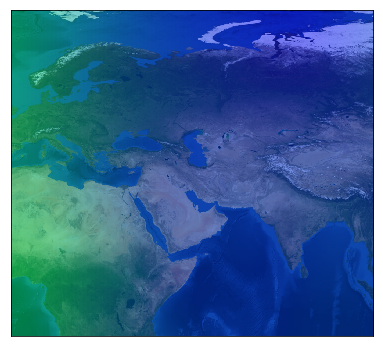

In [14]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=lat_cord[0], urcrnrlat=lat_cord[1],
            llcrnrlon=long_cord[0], urcrnrlon=long_cord[1], )
#plt.imshow(resized_heat_map,alpha=.3,origin='upper',cmap='winter')#
m.bluemarble(scale=0.9);
#m.drawcoastlines()
m.imshow(heat_map,alpha=.5,cmap='winter')

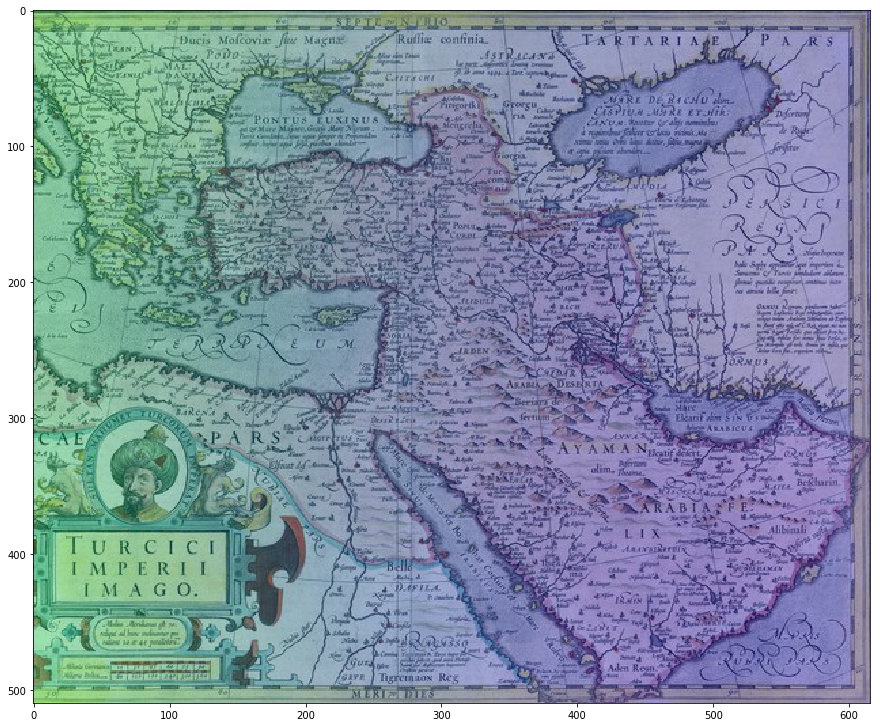

In [68]:
plt.figure(figsize=(15,15))
implot = plt.imshow(np.array(sample),origin='upper')
plt.imshow(resized_heat_map,alpha=.3,origin='upper',cmap='winter')#
plt.show()